In [468]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [469]:
import numpy as np


In [470]:
# %conda install -y ipywidgets

In [471]:
import numpy as np
from vae.arch_custom3dmazegray2z32conv1 import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model
# from sklearn.manifold import TSNE
np.set_printoptions(precision=4, suppress = True)

In [472]:
# vae1 = VAE()
# vae1.set_weights('./vae/weights_custommaze10000.1.ckpt')
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custom3dmaze_gray2_rand5000.5z32k3conv1r100000lr0001.ckpt')
# vae1.set_weights('./vae/weights_custom3dmaze_gray25000.5z32k3conv1r100000lr0001.ckpt')

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 80, 240, 1)] 0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 40, 120, 3)   30          observation_input[0][0]          
__________________________________________________________________________________________________
flatten_14 (Flatten)            (None, 14400)        0           conv_layer_1[0][0]               
__________________________________________________________________________________________________
mu (Dense)                      (None, 32)           460832      flatten_14[0][0]                 
____________________________________________________________________________________________

In [473]:
# from tensorflow.keras.models import Model

In [474]:
# vae=load_model('./vae/')

In [475]:
DIR_NAME = './data/custom3dmaze_gray2/'
file = os.listdir(DIR_NAME)[5]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
reward_data = np.load(DIR_NAME + file)['reward']
obs = obs_data[99]
print(obs_data.shape)

867214095.npz
(1000, 80, 240, 1)


In [476]:
mus, log_vars, _  = vae1.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae1.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

mu = [-0.2585 -0.0087  0.0187  0.0259  0.1088  0.102  -0.0939 -0.0448  0.046
  0.0419  2.4335  0.0882 -0.1648 -0.0034 -0.0647  0.0556  2.3138  0.0063
 -0.0282  0.0127 -0.013  -0.0133  0.0432 -0.0089 -0.0804  0.0061 -0.0386
  0.0406  0.004  -0.0287 -0.0667 -0.1043]
log_var = [-1.2137 -0.4263 -0.0146 -0.2423 -0.268  -0.6134 -0.6635 -0.441   0.008
 -0.4682 -4.2643 -0.563  -0.8673 -0.1138 -0.1055 -0.2719 -4.4005 -0.3055
 -0.3451 -0.4832 -0.3889 -0.3858 -0.6948 -0.5488 -0.6181 -0.2567 -0.4717
 -0.4853 -0.2703 -0.6768 -0.5319 -0.1746]
z = [[-0.2847  0.8489  0.6159  0.2595 -1.0779 -1.574  -1.2336 -1.3112  1.3552
   0.0488  2.5554  0.8743  0.6531 -2.2026 -0.5812 -0.2758  2.3896 -0.4472
  -0.264  -0.2071 -0.6791  0.2853 -0.13    0.0594  0.7593 -0.6857 -0.5354
   0.8472  0.878   0.8434 -0.0853 -1.3808]]


In [477]:
for r in range(len(reward_data)):
    if reward_data[r] != -0.1:
        print(r)

In [478]:
# filelist = os.listdir(DIR_NAME)
# filelist = [x for x in filelist if x != '.DS_Store']
# filelist.sort()

In [479]:
# %conda install -y graphviz

In [480]:
# plot_model(vae1.encoder, to_file='./vae/encoder3dmaze.png', show_shapes=True)
# plot_model(vae1.decoder, to_file='./vae/decoder3dmaze.png', show_shapes=True)


In [481]:
# plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)

In [482]:
# vae1 = VAE()
# vae1.set_weights('./vae/weights_custommaze10000.1.ckpt')

In [483]:
file = os.listdir(DIR_NAME)[1]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[90]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
obs.shape

(80, 240, 1)

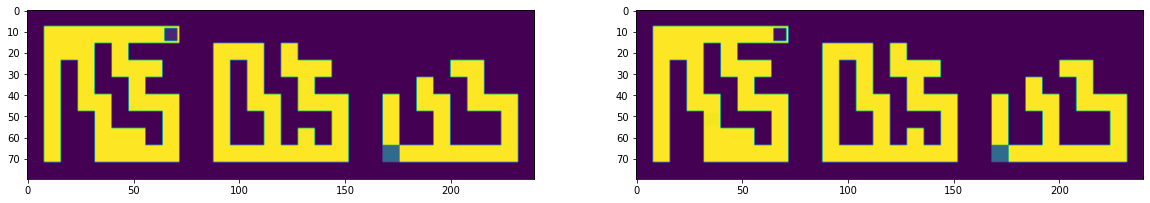

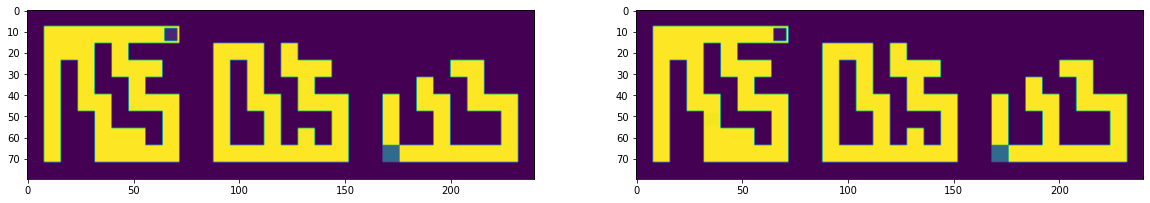

In [484]:

file = os.listdir(DIR_NAME)[1]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[0]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
plt.figure(figsize=(20, 10)) 
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [485]:
# vae2 = VAE()
# vae2.set_weights('./vae/weights1.1rand3.ckpt')

In [486]:
np.array([obs]).shape

(1, 80, 240, 1)

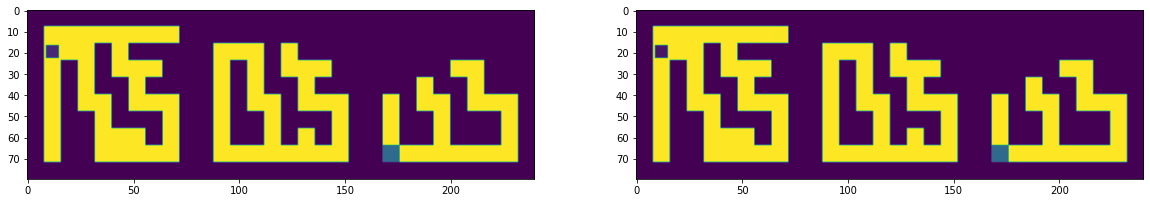

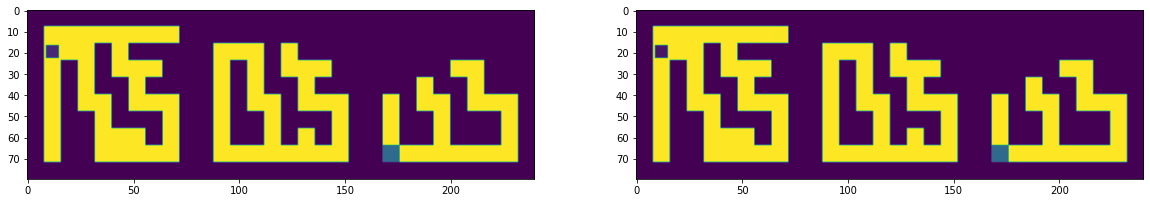

In [487]:
file = os.listdir(DIR_NAME)[2]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[90]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
plt.figure(figsize=(20, 10)) 
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [488]:
# vae3 = VAE()
# vae3.set_weights('./vae/weights1.1rand3.ckpt')

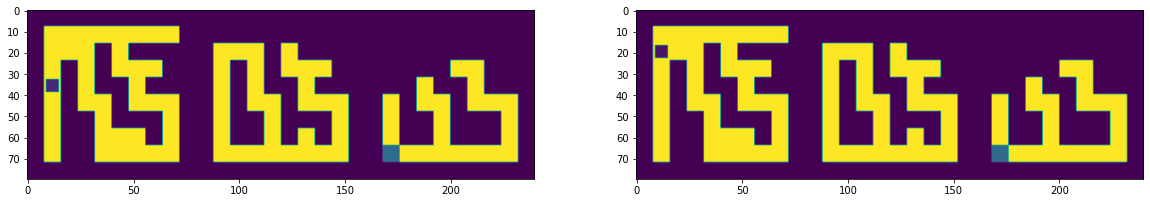

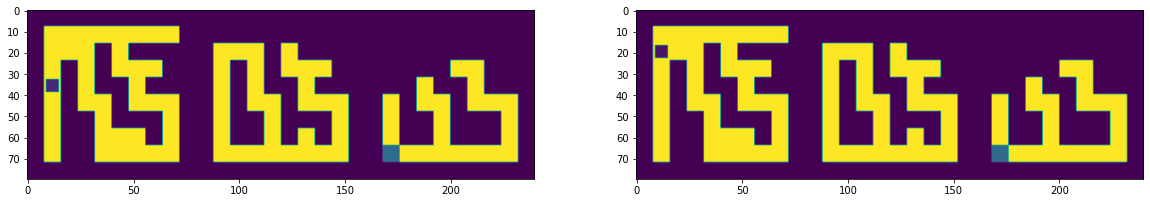

In [489]:

obs = obs_data3[441]
z_decoded = vae1.full_model.predict(np.array([obs]))[0]
plt.figure(figsize=(20, 10)) 
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

In [490]:
# vae3 = VAE()
# vae3.set_weights('./vae/weights200.20804.h5')

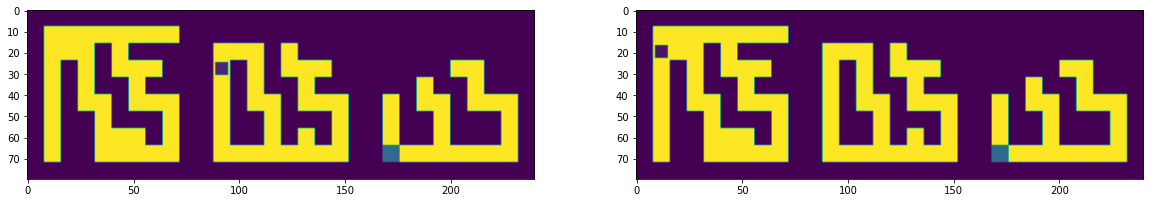

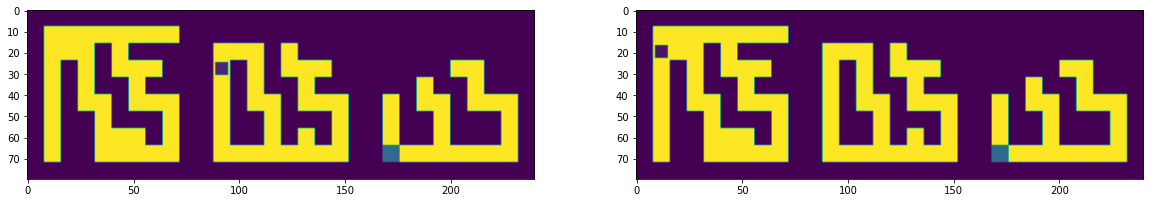

In [491]:
file = os.listdir(DIR_NAME)[5]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[445]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
plt.figure(figsize=(20, 10)) 
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [492]:
import time

KeyboardInterrupt: 

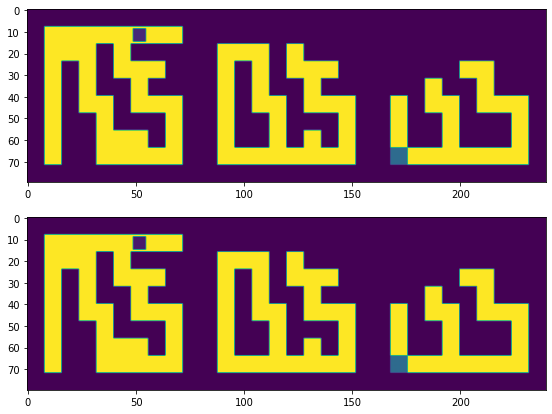

In [493]:
file = os.listdir(DIR_NAME)[6]

obs_data3 = np.load(DIR_NAME + file)['obs']
# obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)

fig_width = 14  # Adjust this value as needed
fig_height = 7  # Adjust this value as needed

# Initialize the figure with the desired size
plt.figure(figsize=(fig_width, fig_height))
for idx in range(0,1000,1):
    plt.gca().cla() 
    
    obs = obs_data3[idx]
    z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
    # z_decoded1を保存するファイル名
    # save_file = f'./vae/decoded1/z_decoded1_data{idx}.npz'
    # z_decoded1をNumPyの配列に変換
    # z_decoded1_array = np.array(z_decoded1)
    # # z_decoded1をnpz形式で保存
    # np.savez(save_file, z_decoded1_array=z_decoded1_array)
    plt.subplot(211)
    plt.imshow( obs[:,:,0])
    plt.subplot(212)
    plt.imshow( z_decoded1[:,:,0])
    
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    print(idx)
    # time.sleep(1)
   





In [ ]:
# filelist = os.listdir('./vae/decoded1')
# filelist = [x for x in filelist if (x != '.DS_Store' and x!='.gitignore')]
# # filelist.sort()
# length_filelist = len(filelist)
# sorted_names = sorted(filelist, key=lambda name: int(''.join(filter(str.isdigit, name))))

In [ ]:
import time

In [ ]:
# im_datas=[]
# for i in range(300):
#     im_data = np.load(f'./vae/decoded1/{sorted_names[i]}')
    
#     im_datas.append(im_data['z_decoded1_array'])
    
#     plt.gca().cla() 
#     plt.imshow(im_datas[i])
    
    
#     time.sleep(0.3)
#     display.clear_output(wait=True)
#     display.display(plt.gcf()) 
    
#     print(i)

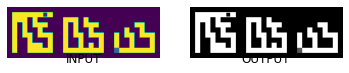

In [ ]:
### output from the full_model
DIR_NAME = './data/custom3dmaze_gray2/'
file = os.listdir(DIR_NAME)[17]#あるエピソード取り出す
obs_data = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データをとりだす(300,64,64,3)

obs = obs_data[4]#1ステップ時間の観測(1,64,64,3)

reconstruction = vae1.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs[:,:,0])
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [ ]:
np.array([obs]).shape

(1, 80, 240, 1)

In [ ]:
mus, log_vars, _  = vae1.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae1.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

mu = [-0.007  -0.0015  0.0469  0.0464  0.0465  0.2233 -0.0108 -0.0548  0.0255
 -0.0574  0.0299  0.0878  0.0237 -0.0011  0.034   0.0293 -0.0427  0.026
  0.0718  0.0219  0.0018  0.0398  3.3451 -0.0444 -0.0681 -0.0065  0.0056
 -0.6252 -0.0115  0.1007 -0.0466 -0.0903]
log_var = [-0.6957 -0.4421 -0.011  -0.2865 -0.2586 -0.9451 -0.654  -0.3841  0.0459
 -0.2945 -0.2577 -0.702  -0.3998 -0.1769 -0.1023 -0.3951 -0.5912 -0.3497
 -0.6262 -0.4358 -0.3857 -0.4016 -5.3095 -0.3688 -0.4633 -0.4904 -0.2759
 -1.6761 -0.1976 -0.8536 -0.4435 -0.1762]
z = [[ 0.6256 -0.0439  0.001  -0.4942  0.3009  0.1243  0.6869  0.1813  0.8805
   0.6668 -0.2781 -0.5385  1.0522  0.6255  1.179  -0.0396  0.4812 -1.9201
   1.5191 -0.9728  0.4247  0.9095  3.3919 -0.2434 -0.2162  0.4414  0.0746
  -0.1784 -0.3799 -1.337   0.6157 -0.4848]]


In [ ]:
print(vae1.encoder.predict(np.array([obs])))

[array([[-0.007 , -0.0015,  0.0469,  0.0464,  0.0465,  0.2233, -0.0108,
        -0.0548,  0.0255, -0.0574,  0.0299,  0.0878,  0.0237, -0.0011,
         0.034 ,  0.0293, -0.0427,  0.026 ,  0.0718,  0.0219,  0.0018,
         0.0398,  3.3451, -0.0444, -0.0681, -0.0065,  0.0056, -0.6252,
        -0.0115,  0.1007, -0.0466, -0.0903]], dtype=float32), array([[-0.6957, -0.4421, -0.011 , -0.2865, -0.2586, -0.9451, -0.654 ,
        -0.3841,  0.0459, -0.2945, -0.2577, -0.702 , -0.3998, -0.1769,
        -0.1023, -0.3951, -0.5912, -0.3497, -0.6262, -0.4358, -0.3857,
        -0.4016, -5.3095, -0.3688, -0.4633, -0.4904, -0.2759, -1.6761,
        -0.1976, -0.8536, -0.4435, -0.1762]], dtype=float32), array([[-1.0294,  0.2474, -0.3618,  0.483 , -0.582 ,  0.7245,  0.3649,
        -0.9444, -0.8506,  0.7531, -2.0045, -0.3307, -0.1443,  1.3115,
        -0.1741, -0.8994, -0.1402,  0.8762,  0.1994, -0.4913,  0.2525,
         1.2265,  3.4197, -0.2017, -0.5467,  0.7943,  0.361 , -0.1075,
        -0.6319,  0.582

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

z = [[ 0.3176 -1.1671  0.2115  0.2982  0.1423  0.6805 -1.3441  1.4154  0.1547
   0.6101 -0.2486 -0.6359 -0.7413  0.6727 -0.3879 -1.0455 -0.813  -0.7111
   0.6462 -0.1819  0.7893 -0.9723  3.219   1.0301  0.2276  0.4137  0.0839
  -0.8451  1.1275 -0.5935  0.4657  0.1629]]


informative dimensions:


array([ 0,  1,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

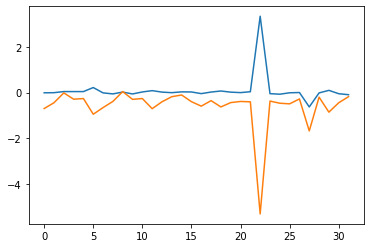

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1

In [ ]:
len(hot_zs1)

30

informative dimensions:


array([22])

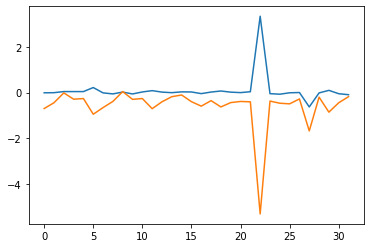

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 2)[0]
hot_zs

In [ ]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [ ]:
vae1.encoder.predict(np.array([obs_data1[20]]))

[array([[-0.0471,  0.0282, -0.0471,  0.0095,  0.1268,  0.0128, -0.0708,
         -0.0172,  0.0425,  0.0283,  0.0168,  0.0086,  0.0418, -0.0572,
         -0.0244,  0.0729,  0.0288, -0.0123,  0.0255,  0.0257, -0.0355,
          0.0323, -0.006 ,  3.0057, -1.7653, -0.02  ,  0.008 ,  0.0959,
          0.02  , -0.021 , -0.0355, -0.0776]], dtype=float32),
 array([[-0.7999, -0.18  ,  0.0103, -0.3591, -0.3091, -0.7303, -0.5877,
         -0.4884,  0.0301, -0.484 , -0.4535, -0.6736, -0.403 , -0.3033,
         -0.1213, -0.4298, -0.746 , -0.3055, -0.4493, -0.3284, -0.4141,
         -0.5153, -0.6064, -4.7102, -3.3518, -0.4336, -0.377 , -0.378 ,
         -0.2955, -0.7147, -0.2445, -0.1651]], dtype=float32),
 array([[-0.0176, -0.824 , -1.2998, -0.6833,  0.3554,  0.056 , -0.6395,
          0.7713,  0.8167, -0.8072, -0.9123, -0.191 , -0.4995, -1.6851,
          0.6245,  0.0401,  0.0774,  0.7822, -0.401 , -0.5599, -1.3157,
          1.5342, -0.2521,  2.9186, -1.5611,  1.2052,  0.0651, -0.7088,
         -

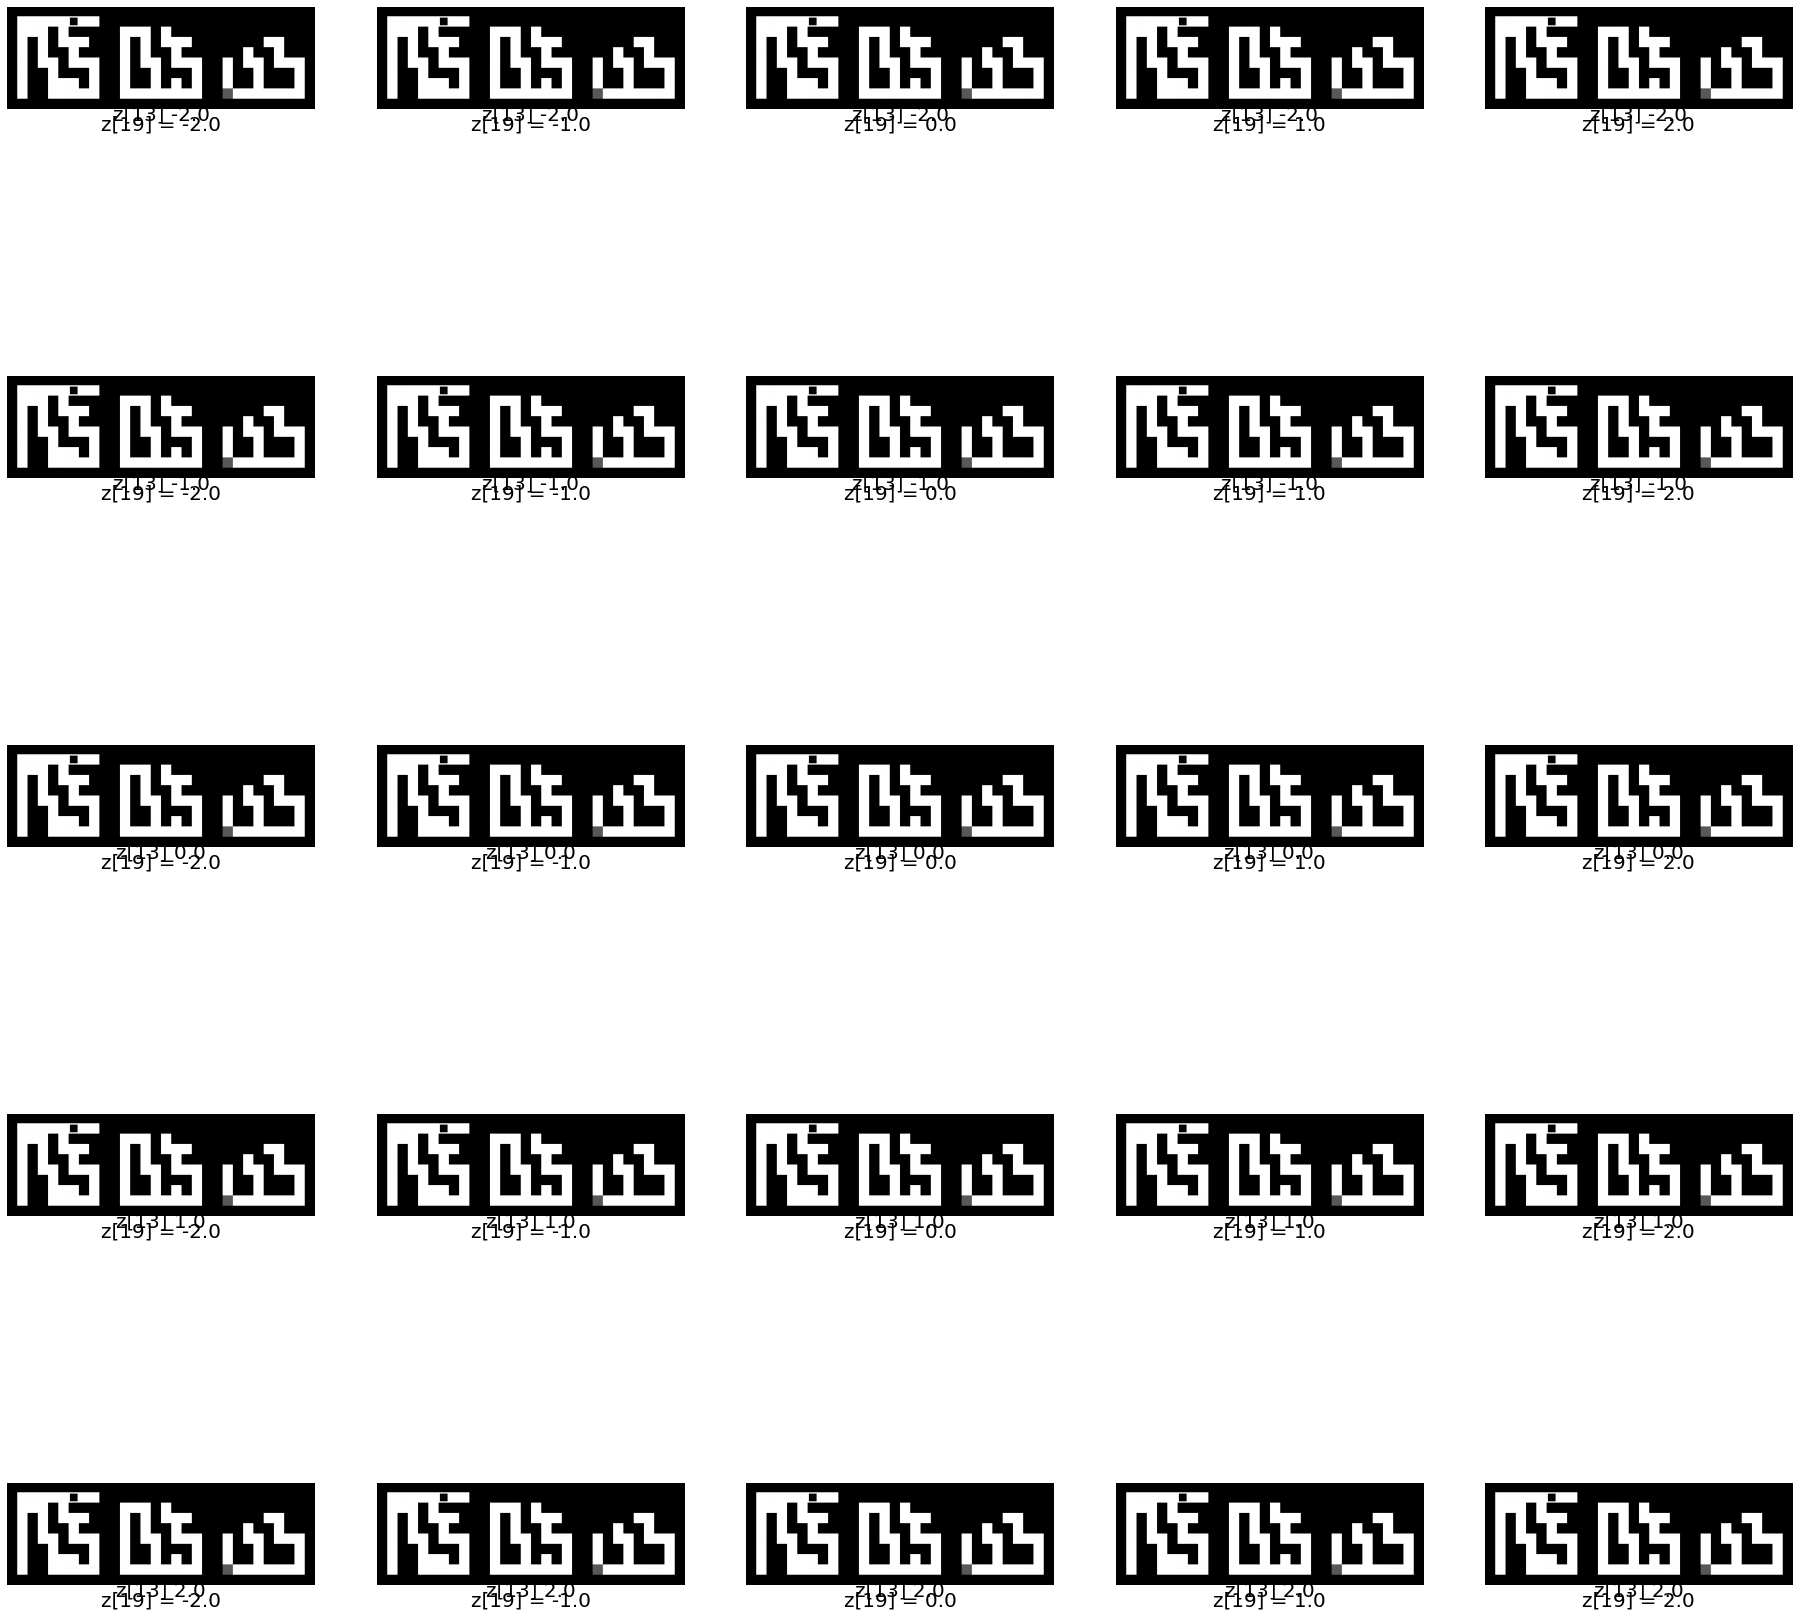

In [ ]:
# top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
# top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
# bottom_left = vae1.encoder.predict(np.array([obs_data1[80]]))[2][0]

sample_z = vae1.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[13] = (x-2)
        z[19] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[13] ' + str(np.round(z[13],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[19] = ' + str(np.round(z[19],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

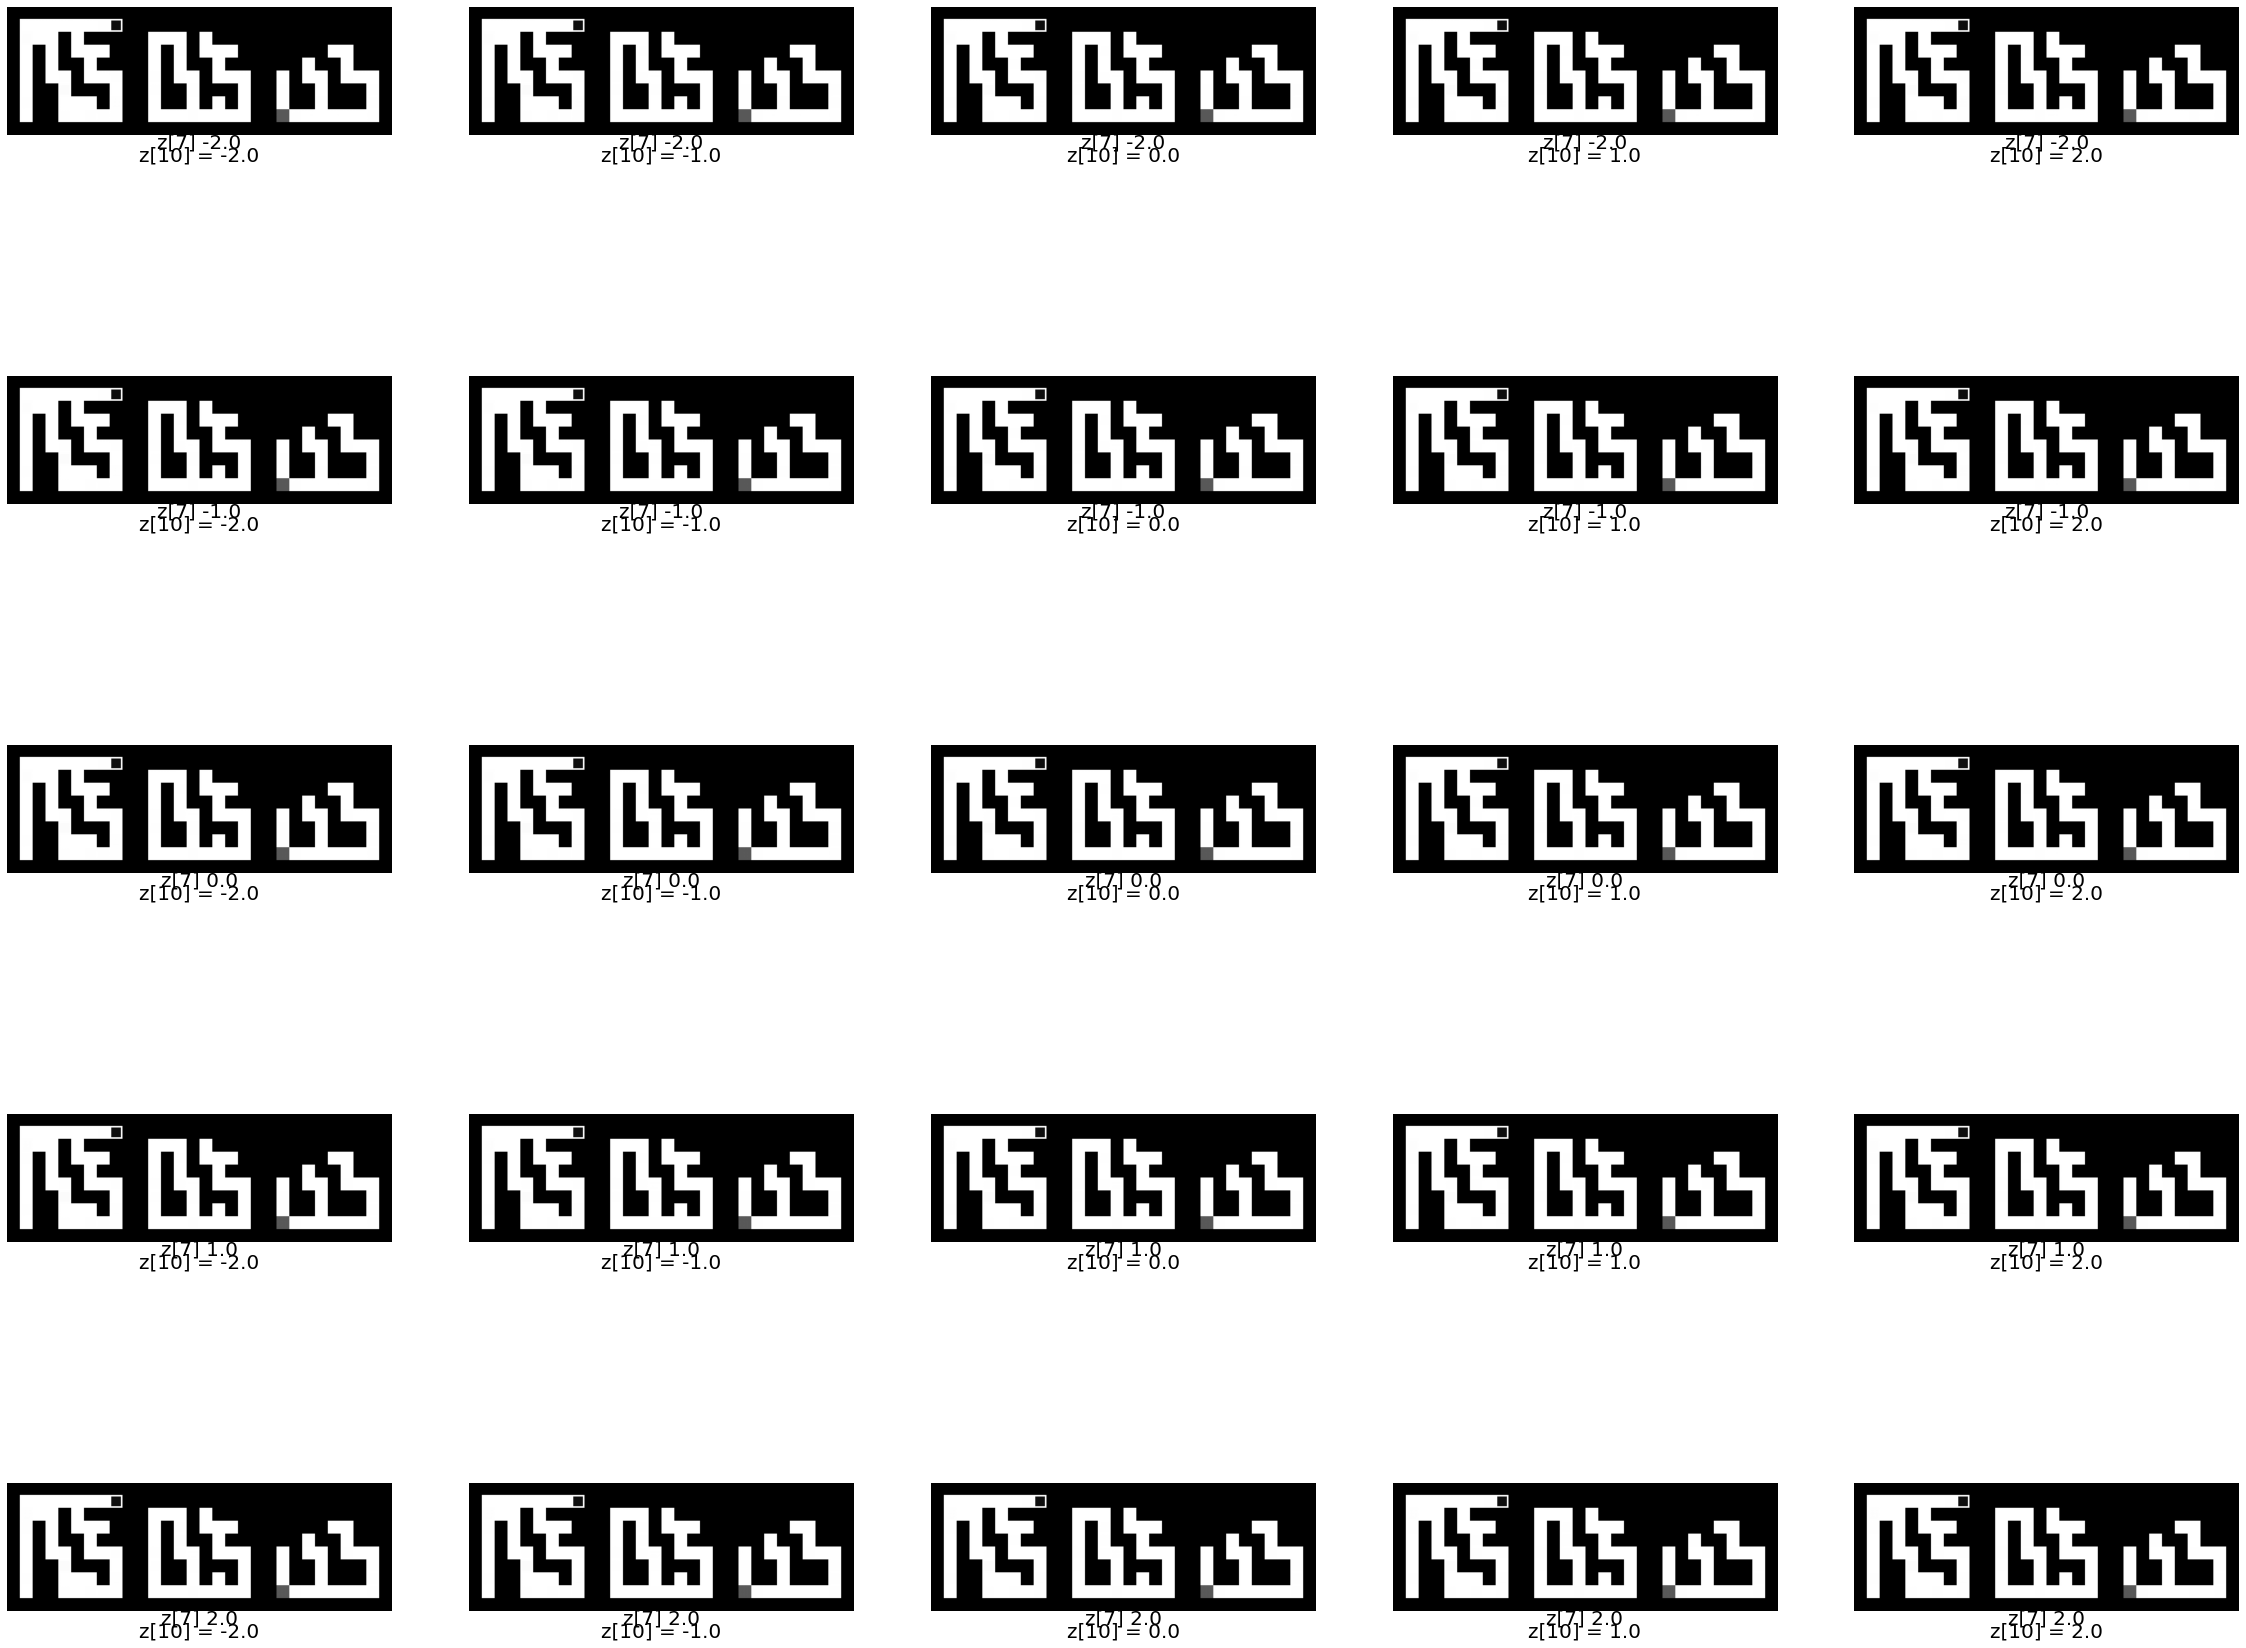

In [ ]:
top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae1.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae1.encoder.predict(np.array([obs_data[22]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(40,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[7] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[7] ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

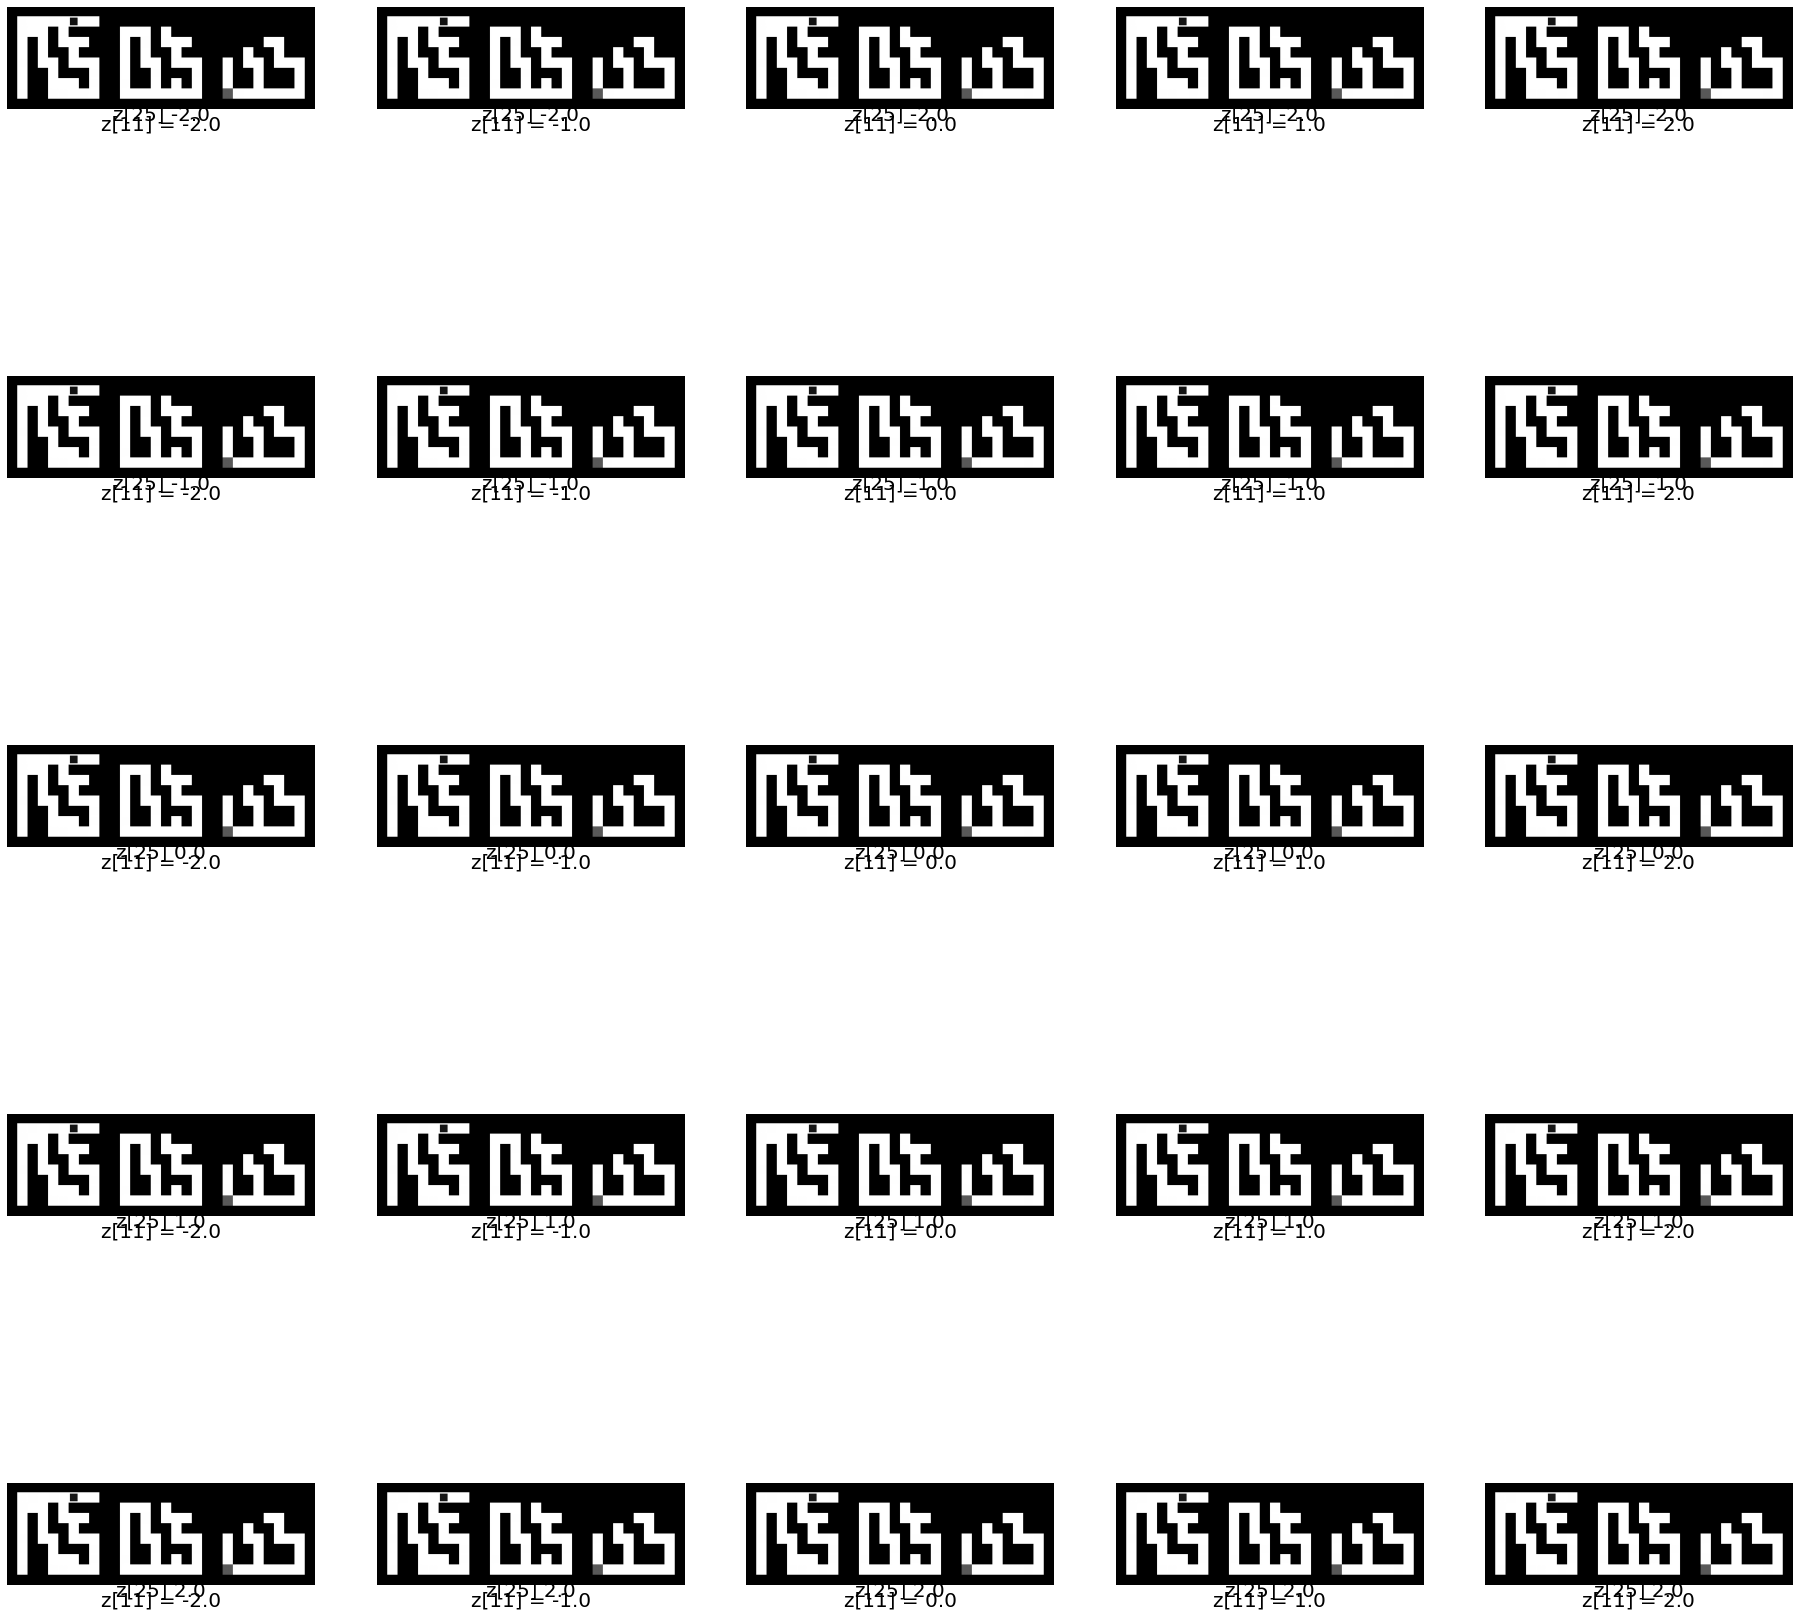

In [ ]:
top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae1.encoder.predict(np.array([obs_data1[80]]))[2][0]

sample_z = vae1.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)


for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[25] = (x-2)
        z[11] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[25] ' + str(np.round(z[25],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[11] = ' + str(np.round(z[11],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [ ]:
top_left = vae3.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae3.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae3.encoder.predict(np.array([obs_data2[80]]))[2][0]

sample_z = vae3.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[13] = (x-2)
        z[22] = (y-2)
        
        decoded_obs = vae3.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[13] ' + str(np.round(z[13],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[22] = ' + str(np.round(z[22],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

NameError: name 'vae3' is not defined

In [ ]:
decoded_obs

array([[[0.5002, 0.4998, 0.4999],
        [0.4998, 0.4996, 0.4999],
        [0.4997, 0.4998, 0.5004],
        ...,
        [0.5004, 0.5001, 0.5001],
        [0.5005, 0.5003, 0.5003],
        [0.4998, 0.5001, 0.4998]],

       [[0.5003, 0.4999, 0.5002],
        [0.5001, 0.5002, 0.4997],
        [0.5   , 0.4998, 0.4998],
        ...,
        [0.5003, 0.5   , 0.4998],
        [0.5002, 0.5002, 0.5003],
        [0.4999, 0.5   , 0.4998]],

       [[0.5001, 0.4999, 0.5001],
        [0.4998, 0.4996, 0.5   ],
        [0.5002, 0.4996, 0.5   ],
        ...,
        [0.4998, 0.5005, 0.5   ],
        [0.5001, 0.5004, 0.4999],
        [0.4999, 0.4997, 0.5002]],

       ...,

       [[0.4996, 0.5003, 0.5003],
        [0.4998, 0.5001, 0.499 ],
        [0.4998, 0.5003, 0.5006],
        ...,
        [0.5006, 0.4993, 0.4987],
        [0.5002, 0.5013, 0.5008],
        [0.5001, 0.5001, 0.4993]],

       [[0.5004, 0.4993, 0.4997],
        [0.4996, 0.5   , 0.4994],
        [0.5009, 0.4992, 0.5004],
        .

In [ ]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z8 = sample_z[8]
                ,z10 = sample_z[10]
                ,z13 = sample_z[13]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z26= sample_z[26]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[8] = z8
    z[10] = z10
    z[13] = z13
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[26] = z26
    z[27] = z27
    
    decoded_obs = vae1.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

In [ ]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z8=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z13=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z26=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=-0.7293716073036194, description='z0', max=3.0, min=-3.0), FloatSlider…

<function __main__.play_with_z(z0=-0.7293716, z2=-1.5487323, z4=0.03945683, z5=-0.81787795, z6=0.71974146, z7=0.9768293, z8=0.714299, z10=-0.65156126, z13=-1.3383039, z15=0.9658649, z24=0.70276463, z25=-0.46953642, z26=0.21323122, z27=-0.19417028)>

In [ ]:
vae.full_model.summary()

Model: "vae_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Model)              [(None, 32), (None, 32),  264032    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 3)         1851939   
Total params: 2,115,971
Trainable params: 2,115,971
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mus, log_vars, _  = vae2.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae2.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

mu = [-0.017   1.0687  0.0068 -0.0073 -0.0004 -0.0213  0.0033  0.024   0.0079
  0.0035 -0.0131  0.0011 -0.015  -0.0092  0.0047  0.0038 -0.0126 -0.0023
  0.0115 -0.0105  0.0001 -0.8742 -0.0073 -0.0113 -0.0019 -0.009   0.0036
 -0.0084 -0.0062 -0.0101  0.0079 -0.0058]
log_var = [-0.005  -3.2656  0.0012 -0.0064 -0.0832 -0.0067  0.0038  0.0007 -0.0115
  0.0037  0.0165 -0.0034 -0.004  -0.0111 -0.0069 -0.0027 -0.0044  0.0076
 -0.0005 -0.1436  0.0058 -0.9116  0.0098 -0.0025  0.0009  0.006  -0.0126
 -0.0026 -0.0077 -0.0043 -0.0074  0.0064]
z = [[ 0.7776  1.1109 -0.3628 -0.4584  1.5002  1.0793 -1.1028  0.5392 -0.3817
  -0.1768 -0.961  -1.1162 -1.0017  0.8331  0.1124 -0.7831  0.4714 -1.2231
   1.0771  0.4763  1.2822 -1.8684  0.513  -2.0841  0.3737 -0.3046  0.1204
   0.726   1.7934  0.2073  0.259  -0.0664]]


informative dimensions:


array([ 1, 19, 21])

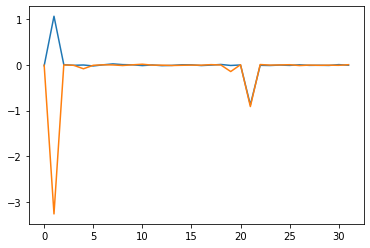

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1